# Get multibolid data



In [27]:
from MLABvo.Bolidozor import Bolidozor
from MLABvo.Bolidozor import timeCalibration 
import json
import datetime
import numpy as np
import scipy.signal
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import dates
import mpltools
import sys
sys.path.append("..") 
import recviewer
import dateutil.parser

%matplotlib inline 

# Inicializace bolidozoru

Funkce ```Bolidozor.getMultibolid``` jako jediný parametr bere id skupiny, které lze zjistit například zde: http://rtbolidozor.astro.cz/multibolid/

In [28]:
multibolid_id = 1686098

In [29]:
bz = Bolidozor()
bolids = bz.getMultibolid(id=multibolid_id)
print('Počet detekcí ve skupině je',len(bolids.result))

Počet detekcí ve skupině je 4


Získaná data z MLABvo jsou k dispozici v ```Bolidozor.getMultibolid.result```.

Následující buňka ukazuje, jak lze procházet záznamy po jednom.

**Výsledek obsahuje následující informace**

In [30]:
for key in bolids.result[0].keys():
    print(key)

magnitude
id_server
url_station
url_file_raw
observatory_name
obstime
namesimple
duration
url_file
url_file_js9
observatory_namesimple
filepath
id_observer
station_name
event_id
peak_f
noise
filename_raw
file_status
filename


Nahrát data do cache

In [31]:
for i, bolid in enumerate(bolids.result):
    print(i+1,'/',len(bolids.result))
    fits.open(bolid['url_file_raw'])

1 / 4
2 / 4
3 / 4
4 / 4


# Kalibrace času

tato funkce projde RAW soubory a snaží se v nich vyhledat GPS značku. 

Výstupem této funkce je ```dictionary```, který obsahuje informace o času na začátku souboru, času konce souboru a prvního vzorku s GPS značkou ze systémového času stanice. Tyto samé časy vrací taktéž oproti GPS času.

Tato smyčka projde všechny soubory a použije na nich funkci pro kalibraci času. Výstup přidá do původní proměnné pod klíčem ```time_calib```.

Pokud je zapnuté debugování, tak ze skriptu vypadávají tato data:
```
delka zaznamu          : Délka záznamu
cas prvni vzorku s GPS : 
cas 1. GPS a konec     : Vzdálenost první detekované GPS ke konci souboru
SysCas ukladani souboru: Čas z hlavičky FITSu ['DATE']
SysCas zacatku souboru : Čas z hlavičky ['DATE'] mínus délka souboru
SysCas 1. GPS znacky   : Systémový čas stanice v okamžiku GPS značky
Korekce systémoveho čas: Systémový čas 
CorCas ukladani souboru: 2017-09-23 07:24:19.241618 s
CorCas zacatku souboru : 2017-09-23 07:24:06.241614
CorCas 1. GPS znacky   : 2017-09-23 07:24:10
```

0 ==================================
snapshot: http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/OBSUPICE/OBSUPICE-R6/meteors/2017/10/11/10/20171011100248209_OBSUPICE-R6_met.fits
Zpracovavam soubor: http://space.astro.cz/bolidozor/OBSUPICE/OBSUPICE-R6/meteors/2017/10/11/10/20171011100248209_OBSUPICE-R6_raws.fits
delka zaznamu          : 11.2 s
cas prvni. vzorku s GPS: 0 s
cas 1. GPS a konec     : 11.2 s
SysCas ukladani souboru: 2017-10-11 10:03:59 s
SysCas zacatku souboru : 2017-10-11 10:03:47.800000
SysCas 1. GPS znacky   : 2017-10-11 10:03:47.800000
Korekce systémoveho čas: 0:00:00
Korekce času zvukovky  : -59.59099984169006
CorCas ukladani souboru: 2017-10-11 10:03:59 s
CorCas zacatku souboru : 2017-10-11 10:03:47.800000
CorCas 1. GPS znacky   : 2017-10-11 10:03:47.800000
Kvalita souboru        : 0
Počet vzorků s gps znač: 0


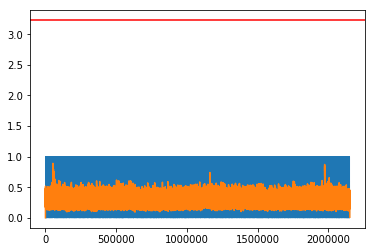

1 ==================================
snapshot: http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/CIIRC/CIIRC-R1/meteors/2017/10/11/10/20171011100531159_CIIRC-R1_met.fits
Zpracovavam soubor: http://space.astro.cz/bolidozor/CIIRC/CIIRC-R1/meteors/2017/10/11/10/20171011100531159_CIIRC-R1_raws.fits
delka zaznamu          : 12.8 s
cas prvni. vzorku s GPS: 0 s
cas 1. GPS a konec     : 12.8 s
SysCas ukladani souboru: 2017-10-11 10:04:00 s
SysCas zacatku souboru : 2017-10-11 10:03:47.200000
SysCas 1. GPS znacky   : 2017-10-11 10:03:47.200000
Korekce systémoveho čas: 0:00:00
Korekce času zvukovky  : 103.95899987220764
CorCas ukladani souboru: 2017-10-11 10:04:00 s
CorCas zacatku souboru : 2017-10-11 10:03:47.200000
CorCas 1. GPS znacky   : 2017-10-11 10:03:47.200000
Kvalita souboru        : 0
Počet vzorků s gps znač: 0


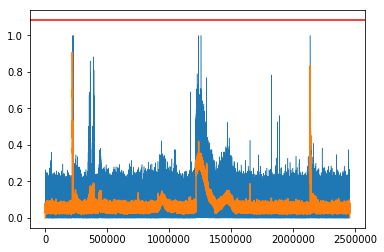

2 ==================================
snapshot: http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/svakov/SVAKOV-R12/meteors/2017/10/11/10/20171011100307719_SVAKOV-R12_met.fits
Zpracovavam soubor: http://space.astro.cz/bolidozor/svakov/SVAKOV-R12/meteors/2017/10/11/10/20171011100307719_SVAKOV-R12_raws.fits
delka zaznamu          : 8.4 s
cas prvni. vzorku s GPS: 0.9688177083333334 s
cas 1. GPS a konec     : 7.431182291666667 s
SysCas ukladani souboru: 2017-10-11 10:03:56 s
SysCas zacatku souboru : 2017-10-11 10:03:47.600000
SysCas 1. GPS znacky   : 2017-10-11 10:03:48.568818
Korekce systémoveho čas: 0:00:01.431182
Korekce času zvukovky  : -41.31218194961548
CorCas ukladani souboru: 2017-10-11 10:03:57.431182 s
CorCas zacatku souboru : 2017-10-11 10:03:49.031182
CorCas 1. GPS znacky   : 2017-10-11 10:03:50
Kvalita souboru        : 100
Počet vzorků s gps znač: 2148


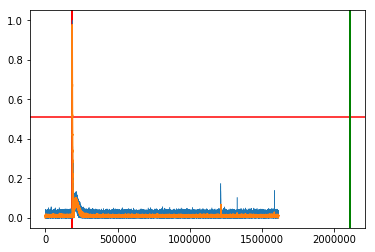

3 ==================================
snapshot: http://space.astro.cz/bolidozor/support/js9browser/#/bolidozor/HFN/HFN-R1/meteors/2017/10/11/10/20171011100411286_HFN-R1_met.fits
hledam alternativni zdroj presneho casu
getMeteorAround list index out of range
## Nelze najit žádné daší meteory v okolí
Zpracovavam soubor: http://space.astro.cz/bolidozor/HFN/HFN-R1/meteors/2017/10/11/10/20171011100411286_HFN-R1_raws.fits
delka zaznamu          : 7.4 s
cas prvni. vzorku s GPS: 0 s
cas 1. GPS a konec     : 7.4 s
SysCas ukladani souboru: 2017-10-11 10:03:57 s
SysCas zacatku souboru : 2017-10-11 10:03:49.600000
SysCas 1. GPS znacky   : 2017-10-11 10:03:49.600000
Korekce systémoveho čas: 0:00:00
Korekce času zvukovky  : 21.686000108718872
CorCas ukladani souboru: 2017-10-11 10:03:57 s
CorCas zacatku souboru : 2017-10-11 10:03:49.600000
CorCas 1. GPS znacky   : 2017-10-11 10:03:49.600000
Kvalita souboru        : 25
Počet vzorků s gps znač: 0


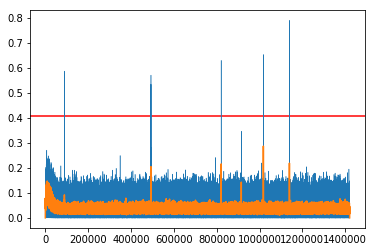

In [32]:
np.set_printoptions(suppress=True)

for i, bolid in enumerate(bolids.result):
    try:
        print(i,"==================================")
        print("snapshot:", bolid['url_file_js9'])
        bolids.result[i]['time_calib']=timeCalibration(bolid['url_file_raw'], bolid['station_name'])
    except Exception as e:
        print("for bolids.result:", e)
    

# Filtr nevyhovujících dat

Protože v některých datech nemusí být dobře detekovatelná GPS značka, je zde možné tyto soubory ručně vyřadit. A to tím, že odkomentujete druhý řádek následující buňky a do seznamu napíšete čísla vyhovujících RAW souborů. (Jsou k nalezení ve výstupu předchozí buňky)

In [33]:
time_offset = {}
selected = list(range(0, len(bolids.result)))     # vyber vsech dat

#selected.remove(0)

#selected = [3,4,5,6]     #Pokud chcete vybrat konkrétní data, 
                               #odkomentujte tento řádek a vložte do něj čísla požadovaných dat

# time_offset[0] = +0   ## Posun času na stanici.
                        # Timto posunete data pro určitou stanici (podle indexu souboru)
                        # o určitý počet časových značek (10s intervalů) Kladné číslo posune graf 'nahoru" 

for i, bolid in enumerate(bolids.result):
    if bolid['time_calib']['quality'] < 50:
        selected.remove(i)
    if i in selected:
        print(i, bolid['time_calib']['quality'], 'sysT of gps:', bolid['time_calib']['cor_1st_GPS'],
              ',offset:', bolid['time_calib']['sys_correction'], bolid['filename'])

2 100 sysT of gps: 2017-10-11 10:03:50 ,offset: 0:00:01.431182 20171011100307719_SVAKOV-R12_met.fits


# Zarovnané soubory

Toto je první buňka, jejíž výstup obsahuje časově zarovnané grafy. Pomocí proměnné ```gps_calib``` můžete nastavit, zdali Vaše zarovnání bude oproti absolutním GPS značkám (```gps_calib=True```) nebo oproti systémovému času stanic (```gps_calib=False```).

TypeError: 'AxesSubplot' object is not iterable

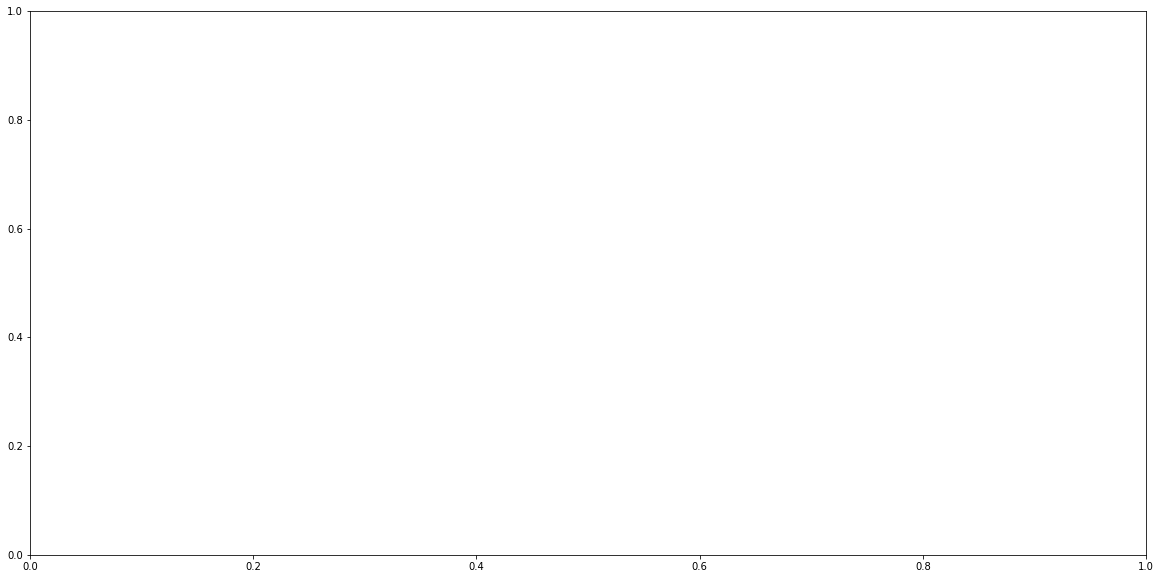

In [34]:
%matplotlib inline 
count = len(selected)
fig, axis = plt.subplots(1, count, sharex=True, sharey=True, figsize=(20, 10))

gps_calib = True
minimal_time = None
maximal_time = None

for i, ax in enumerate(axis):
    try:
        bolid = bolids.result[selected[i]]
        print (i, bolid['time_calib']['cor_file_beg'])
        hdulist = fits.open(bolid['url_file_raw'])
        met_data = np.abs(np.ravel(hdulist[0].data))

        T_offset = 10*time_offset.get(selected[i], 0)

        if gps_calib:
            ax.set_title(bolid['namesimple'] + " (%s, %s)"%(selected[i], bolid['time_calib']['method']))
            min_date = bolid['time_calib']['cor_file_beg'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
            max_date = bolid['time_calib']['cor_file_end'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
        else:
            ax.set_title(bolid['namesimple'] + " (" + str(selected[i])+") SYS-T")
            min_date = bolid['time_calib']['sys_file_beg'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
            max_date = bolid['time_calib']['sys_file_end'].replace(tzinfo=datetime.timezone.utc).timestamp()+T_offset
        array = np.arange(min_date, max_date, (max_date-min_date)/(len(met_data)))

        if not minimal_time: minimal_time = min_date
        if not maximal_time: maximal_time = max_date
        if min_date < minimal_time: minimal_time = min_date
        if max_date > maximal_time: maximal_time = max_date

        ax.plot(met_data, array)
        ax.grid(True)
    except Exception as e:
        print(e)

fig.subplots_adjust(hspace=0)
print(minimal_time, maximal_time)

{}


TypeError: a float is required

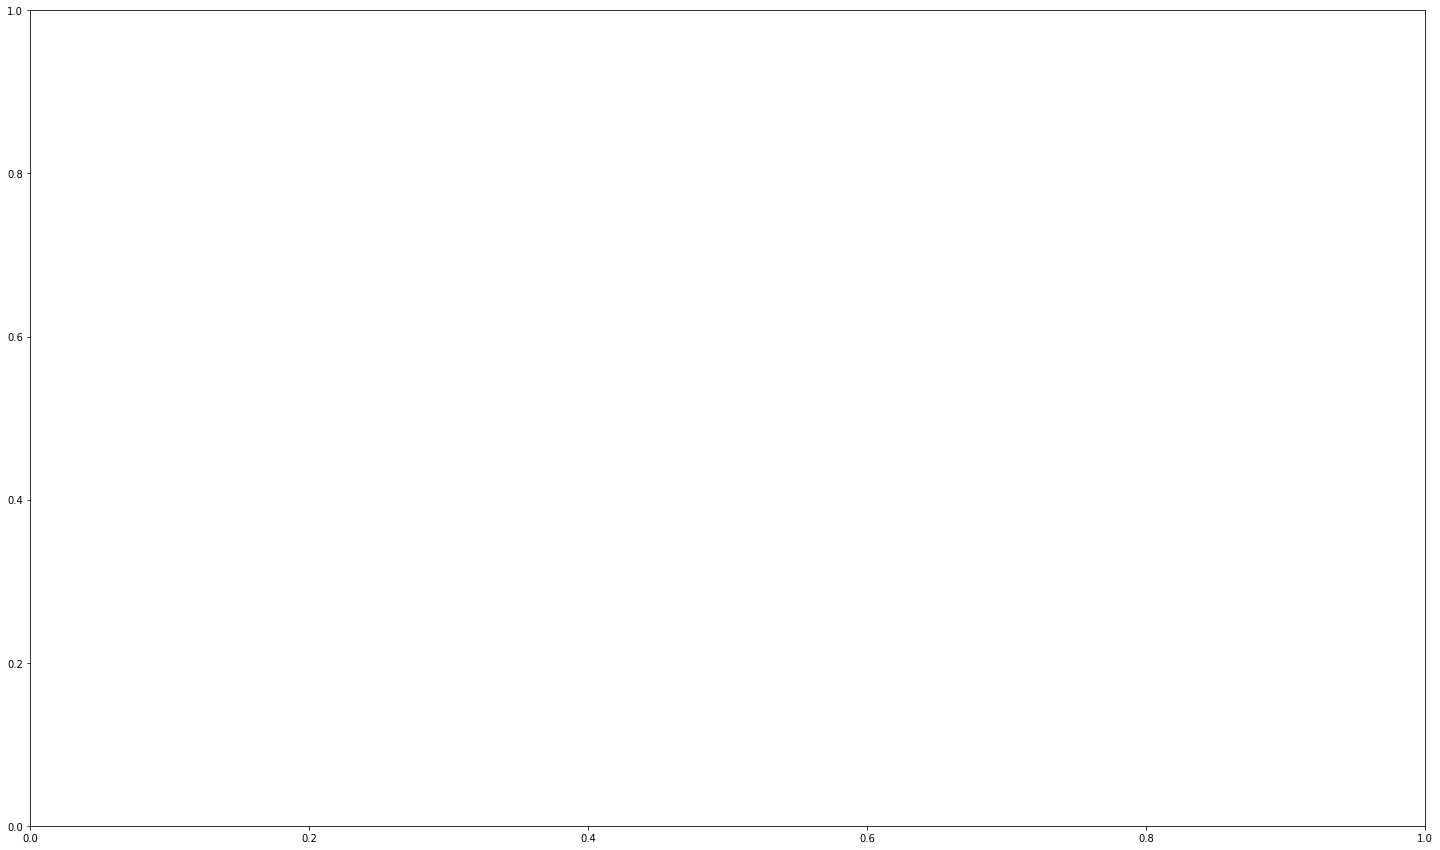

In [35]:
%matplotlib inline 
#%matplotlib notebook
count = len(selected)
fig, axis = plt.subplots(1, count, sharex=True, sharey=True, figsize=(25, 15))

print(time_offset)
fig.suptitle("Multibolid %s (%s)" %(datetime.datetime.utcfromtimestamp(minimal_time).date(), multibolid_id))
fig.subplots_adjust(hspace=0)
plt.set_cmap('hot')
for i, ax in enumerate(axis):
    bolid = bolids.result[selected[i]]
    hdu = fits.open(bolid['url_file_raw'])[0]
    flat_data = np.ravel(hdu.data)
    
    T_offset = datetime.timedelta(seconds = 10*time_offset.get(selected[i], 0))
    #print(i, selected[i], bolid['time_calib']['cor_file_beg'], bolid['time_calib']['cor_file_beg']+T_offset, T_offset)
    d1 = bolid['time_calib']['cor_file_beg']+T_offset
    fds1 = dates.date2num(d1) # converted
    d2 = d1 + datetime.timedelta(seconds=hdu.header['NAXIS2']/49000.0/2)
    fds2 = dates.date2num(d2)
    
    arr = waterfall(flat_data[0::2] + 1j * flat_data[1::2], 49000, bins = 4096*4)
    ax.imshow(arr,  interpolation='none', aspect='auto',  extent=[-24000, 24000, fds2, fds1])
    ax.grid(True)
    
    ax.set_xlim(13000,13500)
    ax.yaxis_date()
    date_format = md.DateFormatter('%H:%M:%S')
    ax.yaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    ax.set_ylim( datetime.datetime.utcfromtimestamp(minimal_time), datetime.datetime.utcfromtimestamp(maximal_time))
    
    #offset = abs(bolid['time_calib']['sys_correction']).microseconds/1000000 + abs(bolid['time_calib']['cor_error']).seconds
    #if bolid['time_calib']['sys_correction'] < datetime.timedelta(seconds=0): offset = -offset
    #ax.set_title(bolid['namesimple']+ " err:"+str(offset))
    ax.set_title(bolid['namesimple'])
plt.savefig('output.png', dpi=300)



In [ ]:
export = 'multibolid_%s_%s.ipynb' %(multibolid_id, datetime.datetime.utcfromtimestamp(minimal_time).date())
print(export)
#%notebook $export

# Tweet
Tato část odešle multibolid porovnání na twitter účet bolidozoru. https://twitter.com/bolidozor

V počítači je potřeba mít vytvořený konfigurační soubor s kódy pro přihlášení. Takový soubor musí vypadat takto

```
[twitter]
CONSUMER_KEY = consumer_key
CONSUMER_SECRET = consumer_secret
ACCESS_TOKEN_KEY = access_token_key
ACCESS_TOKEN_SECRET = access_token_secret
```

Pokud při uploadování se nenahraje obrázek kvůli TimeOutu, zkuste zmenšit DPI grafu.

In [168]:
from TwitterAPI import TwitterAPI
import base64
import configparser
import time

parser = configparser.ConfigParser()
parser.read('/home/roman/bolidozor_access.ini')
CONSUMER_KEY = parser['twitter']['CONSUMER_KEY']
CONSUMER_SECRET = parser['twitter']['CONSUMER_SECRET']
ACCESS_TOKEN_KEY = parser['twitter']['ACCESS_TOKEN_KEY']
ACCESS_TOKEN_SECRET =parser['twitter']['ACCESS_TOKEN_SECRET']

file = open('output.png', 'rb')
data = base64.b64encode(file.read())

api = TwitterAPI(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET, auth_type='oAuth1')
media = api.request('media/upload', None, {'media_data':data})
print(media.status_code, media.text)
m_id = json.loads(media.text)['media_id']
print(m_id)

time.sleep(1)
status_text='''
Multibolid-event on %s (id:%s)
More details at http://rtbolidozor.astro.cz/multibolid/event/%s/
This tweet was uploaded from Multibolid-analyser
''' %(datetime.datetime.utcfromtimestamp(minimal_time).date(), multibolid_id, multibolid_id)

r = api.request('statuses/update', {'status':status_text, 'media_ids':m_id})
print(status_text)
print(r.status_code, r.text)


200 {"media_id":917660938500788224,"media_id_string":"917660938500788224","size":538900,"expires_after_secs":86400,"image":{"image_type":"image\/png","w":7500,"h":4500}}
917660938500788224

Multibolid-event on 2017-10-03 (id:1595904)
More details at http://rtbolidozor.astro.cz/multibolid/event/1595904/
This tweet was uploaded from Multibolid-analyser

200 {"created_at":"Tue Oct 10 07:59:56 +0000 2017","id":917660958532751361,"id_str":"917660958532751361","text":"Multibolid-event on 2017-10-03 (id:1595904)\nMore details at https:\/\/t.co\/JnanzzP7mY\nThis tweet was uploaded from Mu\u2026 https:\/\/t.co\/GOLau8h0T2","truncated":true,"entities":{"hashtags":[],"symbols":[],"user_mentions":[],"urls":[{"url":"https:\/\/t.co\/JnanzzP7mY","expanded_url":"http:\/\/rtbolidozor.astro.cz\/multibolid\/event\/1595904\/","display_url":"rtbolidozor.astro.cz\/multibolid\/eve\u2026","indices":[60,83]},{"url":"https:\/\/t.co\/GOLau8h0T2","expanded_url":"https:\/\/twitter.com\/i\/web\/status\/917660958532

# Extract head-echo


In [14]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='full')
    return y_smooth


%matplotlib inline 
#%matplotlib notebook
print('len', len(selected))

#print(time_offset)
#fig.suptitle("Multibolid %s (%s)" %(datetime.datetime.utcfromtimestamp(minimal_time).date(), multibolid_id))
#fig.subplots_adjust(hspace=0)
#plt.set_cmap('hot')

'''
head_lines = {
    #0:[(4,13350),(25,13250)]
    0:[[2,27],[13350,13250]],
    3:[[0,16],[13335,13250]],
    4:[[4,24],[13360,13250]],
    6:[[41,73],[13450,13250]]
}
'''

f = open("meteor_%s_%s_raw.obs"%(multibolid_id, datetime.datetime.utcfromtimestamp(minimal_time).date()), 'w')
f.write('#F %s\n' %datetime.datetime.utcfromtimestamp(minimal_time).date())
for i, meteor in enumerate(selected):
    f.write('\n')
    %matplotlib inline
    bolid = bolids.result[meteor]
    print(i, meteor, bolid['url_file_raw'])
    
    hdu = fits.open(bolid['url_file_raw'])[0]
    flat_data = np.ravel(hdu.data)
    
    bins = 4096*2
    arr = waterfall(flat_data[0::2] + 1j * flat_data[1::2], 49000, bins = bins*2)[:,bins:]
    min_crop = 4500
    max_crop = 3600
    file_length = samp2time(hdu.header['NAXIS2']*2)    
    step_time = file_length/(arr.shape[0])
        
    step_freq = 24000/bins
    min_freq = min_crop*step_freq
    max_freq = 24000 - max_crop*step_freq

    selection = arr[:,+min_crop:-max_crop]
    
    plt.imshow(selection, aspect='auto', extent=[min_freq, max_freq,
                                                 bolid['time_calib']['cor_file_end'].timestamp(),
                                                 bolid['time_calib']['cor_file_beg'].timestamp()])

    plt.show()
    
    peak = np.empty([0,2])
    for i, row in enumerate(selection):
        max_i = np.argmax(row)
        max_v = row[max_i]
        peak = np.concatenate((peak, [[bolid['time_calib']['cor_file_beg'].timestamp()+i*step_time, -13250+(min_crop+max_i)*step_freq]]))
        f.write("%i\t%f\t%f\n" %(meteor,
                                 #bolid['time_calib']['cor_file_beg']+datetime.timedelta(seconds=i*step_time),
                                 bolid['time_calib']['cor_file_beg'].timestamp()+i*step_time,
                                 -13250+(min_crop+max_i)*step_freq
                                )
                )
        #plt.plot(row)
        #plt.show()
        #plt.plot(row)
    #plt.show()
    
    #plt.plot(peak[:,0], peak[:,1])
    plt.plot(peak[:,0],peak[:,1], 'x')
    
    '''  Tato část slouží k hledani bodu headecha podle primek 'head_lines'
    head = np.empty([0,2])
    if meteor in head_lines:
        plt.plot(head_lines[meteor][0],head_lines[meteor][1])
        vector = (1, (head_lines[meteor][1][1]-head_lines[meteor][1][0])/(head_lines[meteor][0][1]-head_lines[meteor][0][0]))
        print(vector)
        for p in peak:
            if head_lines[meteor][0][0] <= p[0] <= head_lines[meteor][0][1]:
                #print(p)
                pos = (p[0]+1)*vector[0]
                d = (head_lines[meteor][1][0]+(pos+1)*vector[1]) - p[1]
                #print(pos, d, p[1])
                if abs(d) < 50:
                    head = np.concatenate((head, [[p[0], p[1]]]))
                
                #d = np.linalg.norm(np.cross(head_lines[meteor][0][1]-head_lines[meteor][0][0], head_lines[meteor][1][1]-head_lines[meteor][1][0]))/np.linalg.norm(p[1])
                #print(d)
        plt.plot(head[:,1], '*')
    '''
        
    plt.show()
    #print(peak)
f.close()

len 3
0 0 http://space.astro.cz/bolidozor/svakov/SVAKOV-R12/meteors/2017/10/03/05/20171003055251954_SVAKOV-R12_raws.fits


NameError: name 'samp2time' is not defined

# Výběr head-echa

Nyní je potřeba otevřít soubor ```meteor_[id]_[date]_raw.obs``` a v něm odstanit (nebo zakomentovat '#') řádky, které neodpovídají head-echu. Následně je potřeba soubor uložit s názvem ```meteor_[id]_[date]_clean.obs```. Následující buňka vykreslí vybraná data.

In [15]:
%matplotlib inline
#%matplotlib interactive
#import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)
try:
    f = open("meteor_%s_%s_clean.obs"%(multibolid_id, datetime.datetime.utcfromtimestamp(minimal_time).date()), 'r')
except Exception as e:
    print(e)
    f = open("meteor_%s_%s_raw.obs"%(multibolid_id, datetime.datetime.utcfromtimestamp(minimal_time).date()), 'r')

met_p = {}
for line in f.readlines():
    if ('#' not in line) and ('\t' in line):
        split = line.split('\t')
        if not split[0] in met_p: met_p[split[0]]={'time':[], 'value':[]}
        met_p[split[0]]['time'].append(float(split[1]))
        met_p[split[0]]['value'].append(float(split[2]))
#print(met_p)

for station in met_p:
    print(station)
    #print(station, met_p[station])
    plt.plot(met_p[station]['time'],met_p[station]['value'], 'o-')
plt.show()

[Errno 2] No such file or directory: 'meteor_1595904_2017-10-03_clean.obs'
